CASE STUDY OF TITANIC

In [41]:
'''
Survived 0 = No,1 = Yes
Pclass = Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
Sex = M/F
Age in years
Sibsp = No of parents/children abroad the Titanic
Ticket = Ticket Number
Fare = Passenger fare
Cabin = Cabin Number
Embarked = Port of Embarkation C = Cherbourg, Q= Queenstown ,S = Southampton
'''

'\nSurvived 0 = No,1 = Yes\nPclass = Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd\nSex = M/F\nAge in years\nSibsp = No of parents/children abroad the Titanic\nTicket = Ticket Number\nFare = Passenger fare\nCabin = Cabin Number\nEmbarked = Port of Embarkation C = Cherbourg, Q= Queenstown ,S = Southampton\n'

Acquiring the Data

In [42]:
import pandas as pd
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

filling the null values

In [44]:
#median is used for numerical values & 
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
data = df.drop(["PassengerId","Fare","Ticket","Embarked","Cabin","Name"],axis = 1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,28.0,1,2
889,1,1,male,26.0,0,0


In [46]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [47]:
data.loc[df["Sex"] == "male","Sex"] = 0
data.loc[df["Sex"] == "female","Sex"] = 1
data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
886,0,2,0,27.0,0,0
887,1,1,1,19.0,0,0
888,0,3,1,28.0,1,2
889,1,1,0,26.0,0,0


Divide Data intp Train and Test

In [48]:
from sklearn.model_selection import train_test_split
X = data.drop(['Survived'],axis = 1)
y = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
my_model.fit(X_train,y_train)

LogisticRegression()

In [50]:
predictions = my_model.predict(X_test)
predictions

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

Accuracy

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8491620111731844

Measure Performance of Model

In [52]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
confusion_mat = confusion_matrix(y_test, predictions)
confusion_mat

array([[99, 15],
       [12, 53]], dtype=int64)

In [54]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df


,Predicted neg,Predicted pos
Actual neg,99,15
Actual pos,12,53


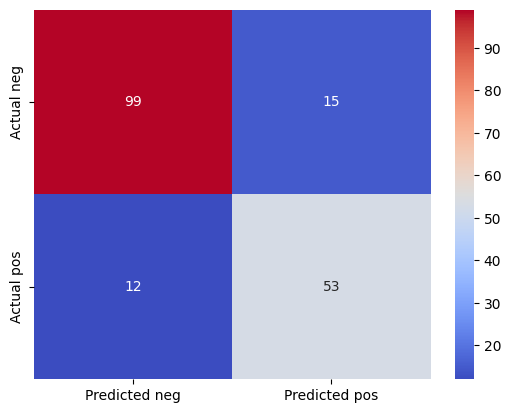

In [55]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot = True)

In [56]:

from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       114
           1       0.78      0.82      0.80        65

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



 Deploy the Model

In [57]:
pred_new=my_model.predict([[1,2,1,55,5]])
pred_new

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [58]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
886,0,2,0,27.0,0,0
887,1,1,1,19.0,0,0
888,0,3,1,28.0,1,2
889,1,1,0,26.0,0,0


In [59]:
predict = my_model.predict([[1,0,45,0,1]])
predict

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)